In [1]:
library("here")
library(devtools)
library(Seurat)

load_all('/home/jpm73279/Socrates')



# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Ufusca/v1.1/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/urochlea_fusca.snake/02.bed_files/"

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"annotation/Ufusca_669_v1.1.gene_only.gff3")
chr <- paste0(reference_genome_path,"assembly/Ufusca_669_v1.0.chrom.size")



here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Loading required package: usethis

Attaching SeuratObject

ℹ Loading Socrates
Loading required package: cicero

Loading required package: monocle

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignette

# Test to Ensure that the Gff3 file is working and analysis is able to  proceed

[1] "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/02.bed_files/panicum_millet.rep_1.pool_B1_G017_10x.filter.mpq_10.modified_bc.rmdup.bed"


Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/02.bed_files/panicum_millet.rep_1.pool_B1_G017_10x.filter.mpq_10.modified_bc.rmdup.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Pmiliaceum/Pmiliaceum.gff ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Pmiliaceum/pm_genmap_output.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...

Making Dotplot



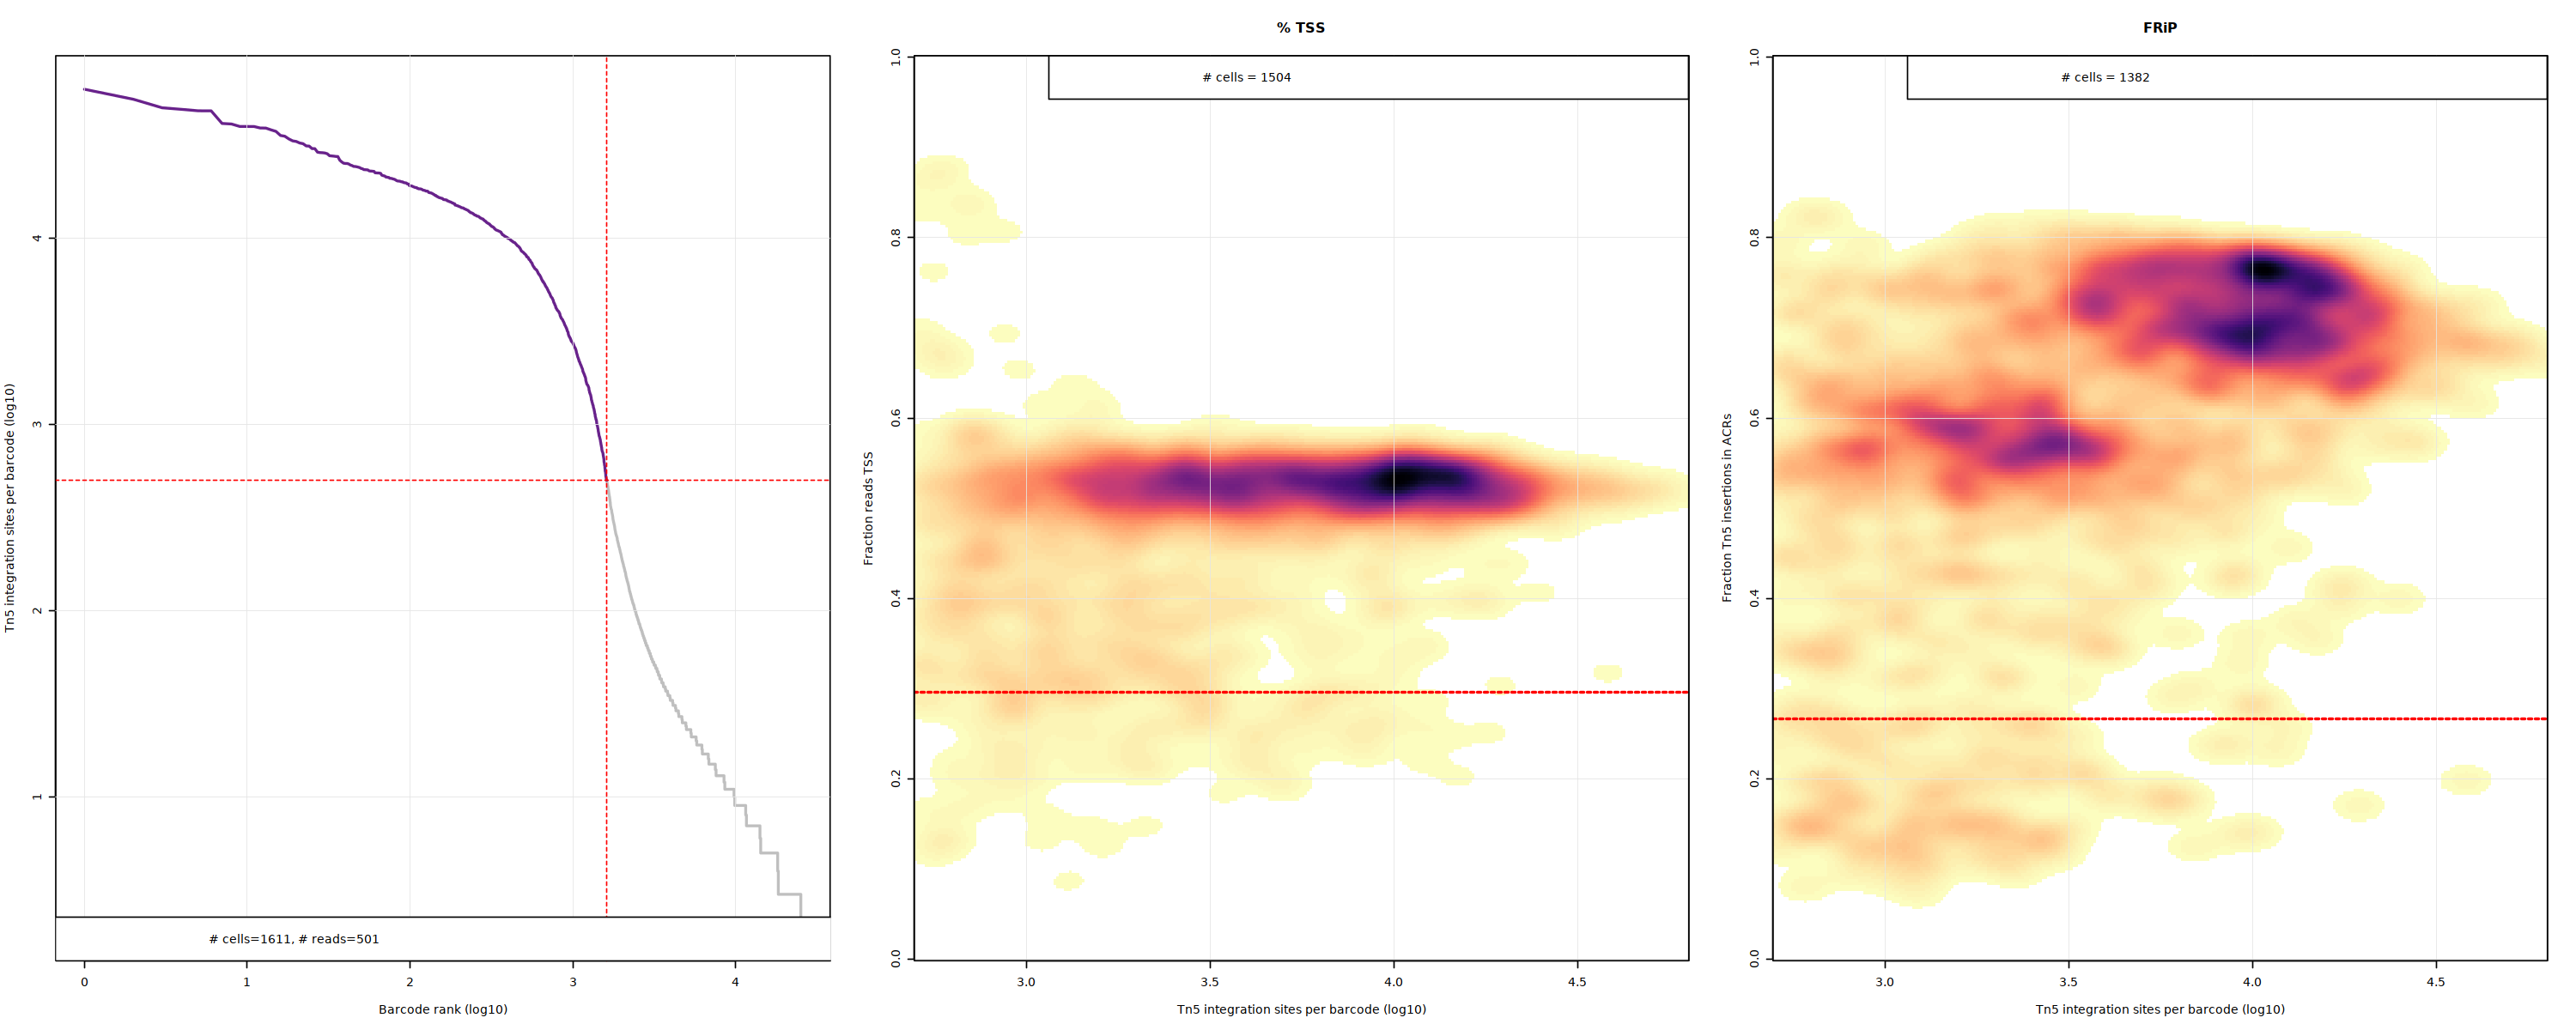

In [9]:
proso_millet_file_list <- list( "rep_1.pool_B1_G017_10x" )


for (i in proso_millet_file_list) {
    
Proso_millet.rep1 <- paste0(analysis_path,"panicum_millet.", i,".filter.mpq_10.modified_bc.rmdup.bed")
print(Proso_millet.rep1)

pre <- i


output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/"
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/QC_output/imgs/"
    
#Load Object
Proso_millet.leaf.rep1 <- loadBEDandGenomeData(Proso_millet.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

# call ACRs
sb_temp_dir <- paste0(analysis_path, paste0(pre, "peaks.tmp"))
Proso_millet.leaf.rep1.acrs <- callACRs(Proso_millet.leaf.rep1, genomesize=2.3e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Proso_millet.leaf.rep1.meta <- buildMetaData(Proso_millet.leaf.rep1.acrs,
                                     tss.window=1500,
                                     verbose=TRUE)



options(repr.plot.width=25, repr.plot.height=10)
Proso_millet.leaf.rep1.meta_file <- findCells(Proso_millet.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=10000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=NULL)

    
}


In [10]:
proso_millet_file_list <- list("rep_1.pool_B1_G017_10x",
"rep_1.pool_B1_G021_10x",
"rep_1.pool_B9_G021_10x",
"rep_1.pool_C1_G017_10x",
"rep_1.pool_C9_G017_10x",
"rep_1.pool_C9_G021_10x",
"rep_1.pool_P1_G017_10x",
"rep_1.pool_P2_G021_10x",
"rep_1.pool_P3_G021_10x",
"rep_1.pool_P8_G017_10x",
"rep_2.pool_P10_G021_10x",
"rep_2.pool_P11_G021_10x",
"rep_2.pool_P12_G021_10x",
"rep_2.pool_P13_G021_10x",
"rep_2.pool_P1_G017_10x",
"rep_2.pool_P1_G021_10x",
"rep_2.pool_R2_P20_G017_10x",
"rep_2.pool_R2_P8_G021_10x",
"rep_2.pool_R2_P9_G021_10x")


for (i in proso_millet_file_list) {
    
Proso_millet.rep1 <- paste0(analysis_path,"panicum_millet.", i,".filter.mpq_10.modified_bc.rmdup.bed")

pre <- i


output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/"
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/QC_output/imgs/"
    
#Load Object
Proso_millet.leaf.rep1 <- loadBEDandGenomeData(Proso_millet.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

# call ACRs
sb_temp_dir <- paste0(analysis_path, paste0(pre, "peaks.tmp"))
Proso_millet.leaf.rep1.acrs <- callACRs(Proso_millet.leaf.rep1, genomesize= 7.2e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Proso_millet.leaf.rep1.meta <- buildMetaData(Proso_millet.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)



options(repr.plot.width=25, repr.plot.height=10)
Proso_millet.leaf.rep1.meta_file <- findCells(Proso_millet.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=1500,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=paste0(output_path_imgs, pre))

# generate sparse matrix
Proso_millet.leaf.rep1.meta_file.filtered <- generateMatrix(Proso_millet.leaf.rep1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)


# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Proso_millet.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Proso_millet.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)
    
}


Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/02.bed_files/panicum_millet.rep_1.pool_B1_G017_10x.filter.mpq_10.modified_bc.rmdup.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Pmiliaceum/Pmiliaceum.gff ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Pmiliaceum/pm_genmap_output.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/02.bed_files/rep_1.pool_B1_G017_10xpeaks.tmp' already exists"
 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata

GFF file path = /home/jpm73279/genome_downloads/Pmiliaceum/Pmiliaceum.gff ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Pmiliaceum/pm_genmap_output.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...

Making Dotplot

 - converting triplet format to sparseMatrix

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/02.bed_files/panicum_millet.rep_2.pool_P10_G021_10x.filter.mpq_10.modified_bc.rmdup.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Pmiliaceum/Pmiliaceum.gff ... ok

Chromosome sizes file path = /home/jpm73279

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...

Making Dotplot

 - converting triplet format to sparseMatrix



### Take Metrics for Plates

In [13]:
proso_millet_file_list <- list("rep_1.pool_B1_G017_10x",
"rep_1.pool_B1_G021_10x",
"rep_1.pool_B9_G021_10x",
"rep_1.pool_C1_G017_10x",
"rep_1.pool_C9_G017_10x",
"rep_1.pool_C9_G021_10x",
"rep_1.pool_P1_G017_10x",
"rep_1.pool_P2_G021_10x",
"rep_1.pool_P3_G021_10x",
"rep_1.pool_P8_G017_10x",
"rep_2.pool_P10_G021_10x",
"rep_2.pool_P11_G021_10x",
"rep_2.pool_P12_G021_10x",
"rep_2.pool_P13_G021_10x",
"rep_2.pool_P1_G017_10x",
"rep_2.pool_P1_G021_10x",
"rep_2.pool_R2_P20_G017_10x",
"rep_2.pool_R2_P8_G021_10x",
"rep_2.pool_R2_P9_G021_10x")


output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/"

df <- data.frame(matrix(ncol = 5, nrow = 0))
colnames(df)<-c("plate", "mean_total", "mean_tss", "mean_acrs", "mean_nsites")

for (i in proso_millet_file_list) {

    meta_file_reads <- readRDS(paste0(output_path,"QC_output/",i, "_QC_soc_obj.rds"))
    
    mean_total <- (mean(meta_file_reads$meta$total))
    mean_tss <- (mean(meta_file_reads$meta$tss))
    mean_acrs <- mean(meta_file_reads$meta$acrs)
    mean_nSites <- mean(meta_file_reads$meta$nSites)

    combined_row <- c(i, mean_total, mean_tss, mean_acrs, mean_nSites)
    df <- rbind(df,combined_row)

}

In [14]:
df

X.rep_1.pool_B1_G017_10x.,X.7994.69230769231.,X.3428.36752136752.,X.5910.20979020979.,X.4446.99611499611.
<chr>,<chr>,<chr>,<chr>,<chr>
rep_1.pool_B1_G017_10x,7994.69230769231,3428.36752136752,5910.20979020979,4446.99611499611
rep_1.pool_B1_G021_10x,4347.73333333333,1866.82845528455,3014.79512195122,2499.46666666667
rep_1.pool_B9_G021_10x,8778.02513747054,3750.09112333071,6475.36606441477,4816.36842105263
rep_1.pool_C1_G017_10x,12539.0825617284,5372.18904320988,9351.78549382716,6646.05324074074
rep_1.pool_C9_G017_10x,8587.11365369947,3656.87414187643,6263.30434782609,4824.35163996949
rep_1.pool_C9_G021_10x,7369.736121673,3140.36273764259,5326.37034220532,4185.77338403042
rep_1.pool_P1_G017_10x,13084.6631578947,5640.09323308271,9997.67819548872,7207.44285714286
rep_1.pool_P2_G021_10x,10567.9591218774,4503.08251324754,7490.02573807721,6197.3028009084
rep_1.pool_P3_G021_10x,10006.213740458,4237.33053435114,6936.06564885496,6000.22595419847


## Full Replicate Analysis

In [2]:
library("here")
library(devtools)
library(Seurat)

load_all('/home/jpm73279/Socrates')



# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Pmiliaceum/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/03.bed_files_merged/"

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"Pmiliaceum.gff")
chr <- paste0(reference_genome_path,"pm_genmap_output.chrom.sizes")



ℹ Loading Socrates
Warning message:
"replacing previous import 'scales::viridis_pal' by 'viridis::viridis_pal' when loading 'Socrates'"


In [3]:
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/"
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/QC_output/imgs/"

pre <- "panicum_millet.rep_1.merged"

analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/03.bed_files_merged/"

Proso_millet.rep1 <- paste0(analysis_path, "panicum_millet.rep_1.filter.mpq_10.rmdup.unique.sorted.bed")

print(Proso_millet.rep1)
#Load Object
Proso_millet.leaf.rep1 <- loadBEDandGenomeData(Proso_millet.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

[1] "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/03.bed_files_merged/panicum_millet.rep_1.filter.mpq_10.rmdup.unique.sorted.bed"


Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/03.bed_files_merged/panicum_millet.rep_1.filter.mpq_10.rmdup.unique.sorted.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Pmiliaceum/Pmiliaceum.gff ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Pmiliaceum/pm_genmap_output.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...

 - finished loading data



In [5]:
Proso_millet.leaf.rep1.no_organelle <- countRemoveOrganelle(Proso_millet.leaf.rep1, 
                                             org_scaffolds = c("CM009689.1"), 
                                             remove_reads = TRUE)

Identified 3691132 organeller reads ...



In [6]:
# call ACRs
sb_temp_dir <- paste0(analysis_path, paste0(pre, "peaks.tmp"))
Proso_millet.leaf.rep1.acrs <- callACRs(Proso_millet.leaf.rep1.no_organelle, 
                genomesize= 7.2e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/03.bed_files_merged/panicum_millet.rep_1.mergedpeaks.tmp' already exists"


In [7]:
Proso_millet.leaf.rep1.meta <- buildMetaData(Proso_millet.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE, 
                                     organelle_scaffolds= c("CM009689.1"))

 - counting Tn5 sites per barcode ...

 - removing organelle scaffolds from annotation ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...




Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:AnnotationDbi':

    select


The following object is masked from 'package:matrixStats':

    count


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following object is masked from 'package:Biobase':

    combine


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




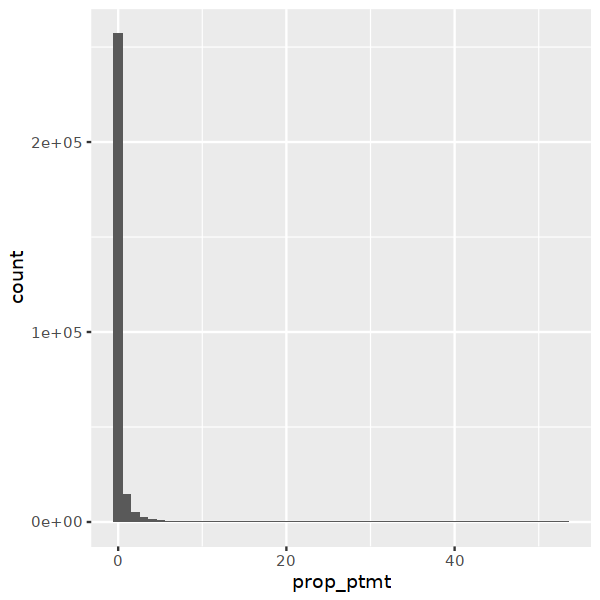

In [8]:
options(repr.plot.width=5, repr.plot.height=5)
library("dplyr")
Proso_millet.leaf.rep1.meta$meta  %>% 
    dplyr::mutate(prop_ptmt = ptmt/total)  %>% 
    ggplot(., aes(prop_ptmt)) + geom_histogram(binwidth = 1)

Making Dotplot

... Filtering Cells based of Oragnelle Reads



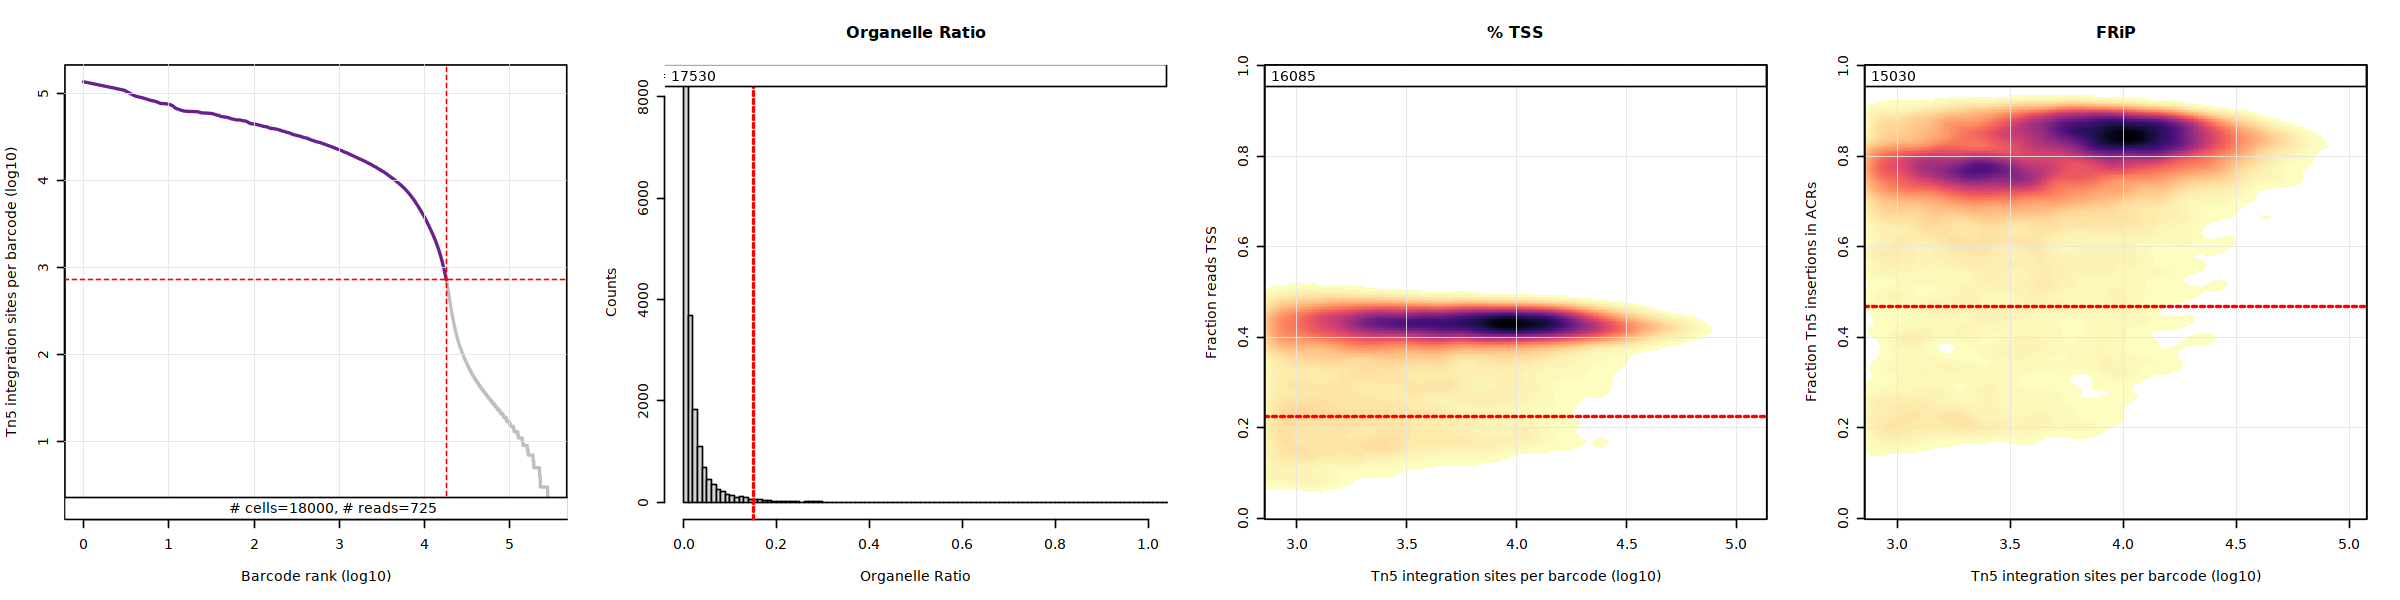

In [9]:
options(repr.plot.width=20, repr.plot.height=5)
Proso_millet.leaf.rep1.meta_file <- findCells(Proso_millet.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=18000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = TRUE,
                                        org.filter.thresh=0.15,
                                        prefix=NULL)

In [10]:
options(repr.plot.width=25, repr.plot.height=10)
Proso_millet.leaf.rep1.meta_file <- findCells(Proso_millet.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=15000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,                                        
                                        filt.org = TRUE,
                                        org.filter.thresh=0.15,
                                              
                                        prefix=paste0(output_path_imgs, pre))

Making Dotplot

... Filtering Cells based of Oragnelle Reads



In [11]:
# generate sparse matrix
Proso_millet.leaf.rep1.meta_file.filtered <- generateMatrix(Proso_millet.leaf.rep1.meta_file,
                            filtered=FALSE,
                            blacklist="/home/jpm73279/genome_downloads/Pmiliaceum/markers/Pm.cell_cycle_orthos.markers.bed",
                            windows=500,
                            peaks=F,
                            verbose=T)

In [12]:
#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

Proso_millet.leaf.rep1.meta_file.filtered <- isCell(Proso_millet.leaf.rep1.meta_file.filtered,
      num.ref = 5000, verbose = TRUE)

 - converting triplet format to sparseMatrix

 - setting filters

 - parsing initial boundaries

 - normalizing distributions and creating references

 - performing feature selection (this step is a bottle-neck and may take a while to complete)

 - estimating correlations



In [13]:
#save_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output"

passing_cells <- Proso_millet.leaf.rep1.meta_file.filtered$meta  %>% 
    dplyr::filter(is_cell == 1)



Proso_millet.leaf.rep1.meta_file.filtered$meta.v3 <- passing_cells
    

In [14]:
# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Proso_millet.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Proso_millet.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

 - converting triplet format to sparseMatrix



### Replicate 2

In [15]:
#output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/"
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/QC_output/imgs/"
pre <- "panicum_millet.rep_2.merged"



Proso_millet.rep1 <- paste0(analysis_path, "panicum_millet.rep_2.filter.mpq_10.rmdup.unique.sorted.bed")

#Load Object
Proso_millet.leaf.rep1 <- loadBEDandGenomeData(Proso_millet.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/03.bed_files_merged/panicum_millet.rep_2.filter.mpq_10.rmdup.unique.sorted.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Pmiliaceum/Pmiliaceum.gff ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Pmiliaceum/pm_genmap_output.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...

 - finished loading data



In [16]:
Proso_millet.leaf.rep1.no_organelle <- countRemoveOrganelle(Proso_millet.leaf.rep1, 
                                             org_scaffolds = c("CM009689.1"), 
                                             remove_reads = TRUE)

Identified 1594770 organeller reads ...



In [17]:
# call ACRs
sb_temp_dir <- paste0(analysis_path, paste0(pre, "peaks.tmp"))
Proso_millet.leaf.rep1.acrs <- callACRs(Proso_millet.leaf.rep1.no_organelle, genomesize= 7.2e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/03.bed_files_merged/panicum_millet.rep_2.mergedpeaks.tmp' already exists"


In [18]:
Proso_millet.leaf.rep1.meta <- buildMetaData(Proso_millet.leaf.rep1.acrs,
                                     tss.window=1000,
                                    organelle_scaffolds= c("CM009689.1"),
                                     verbose=TRUE)

 - counting Tn5 sites per barcode ...

 - removing organelle scaffolds from annotation ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



Making Dotplot

... Filtering Cells based of Oragnelle Reads



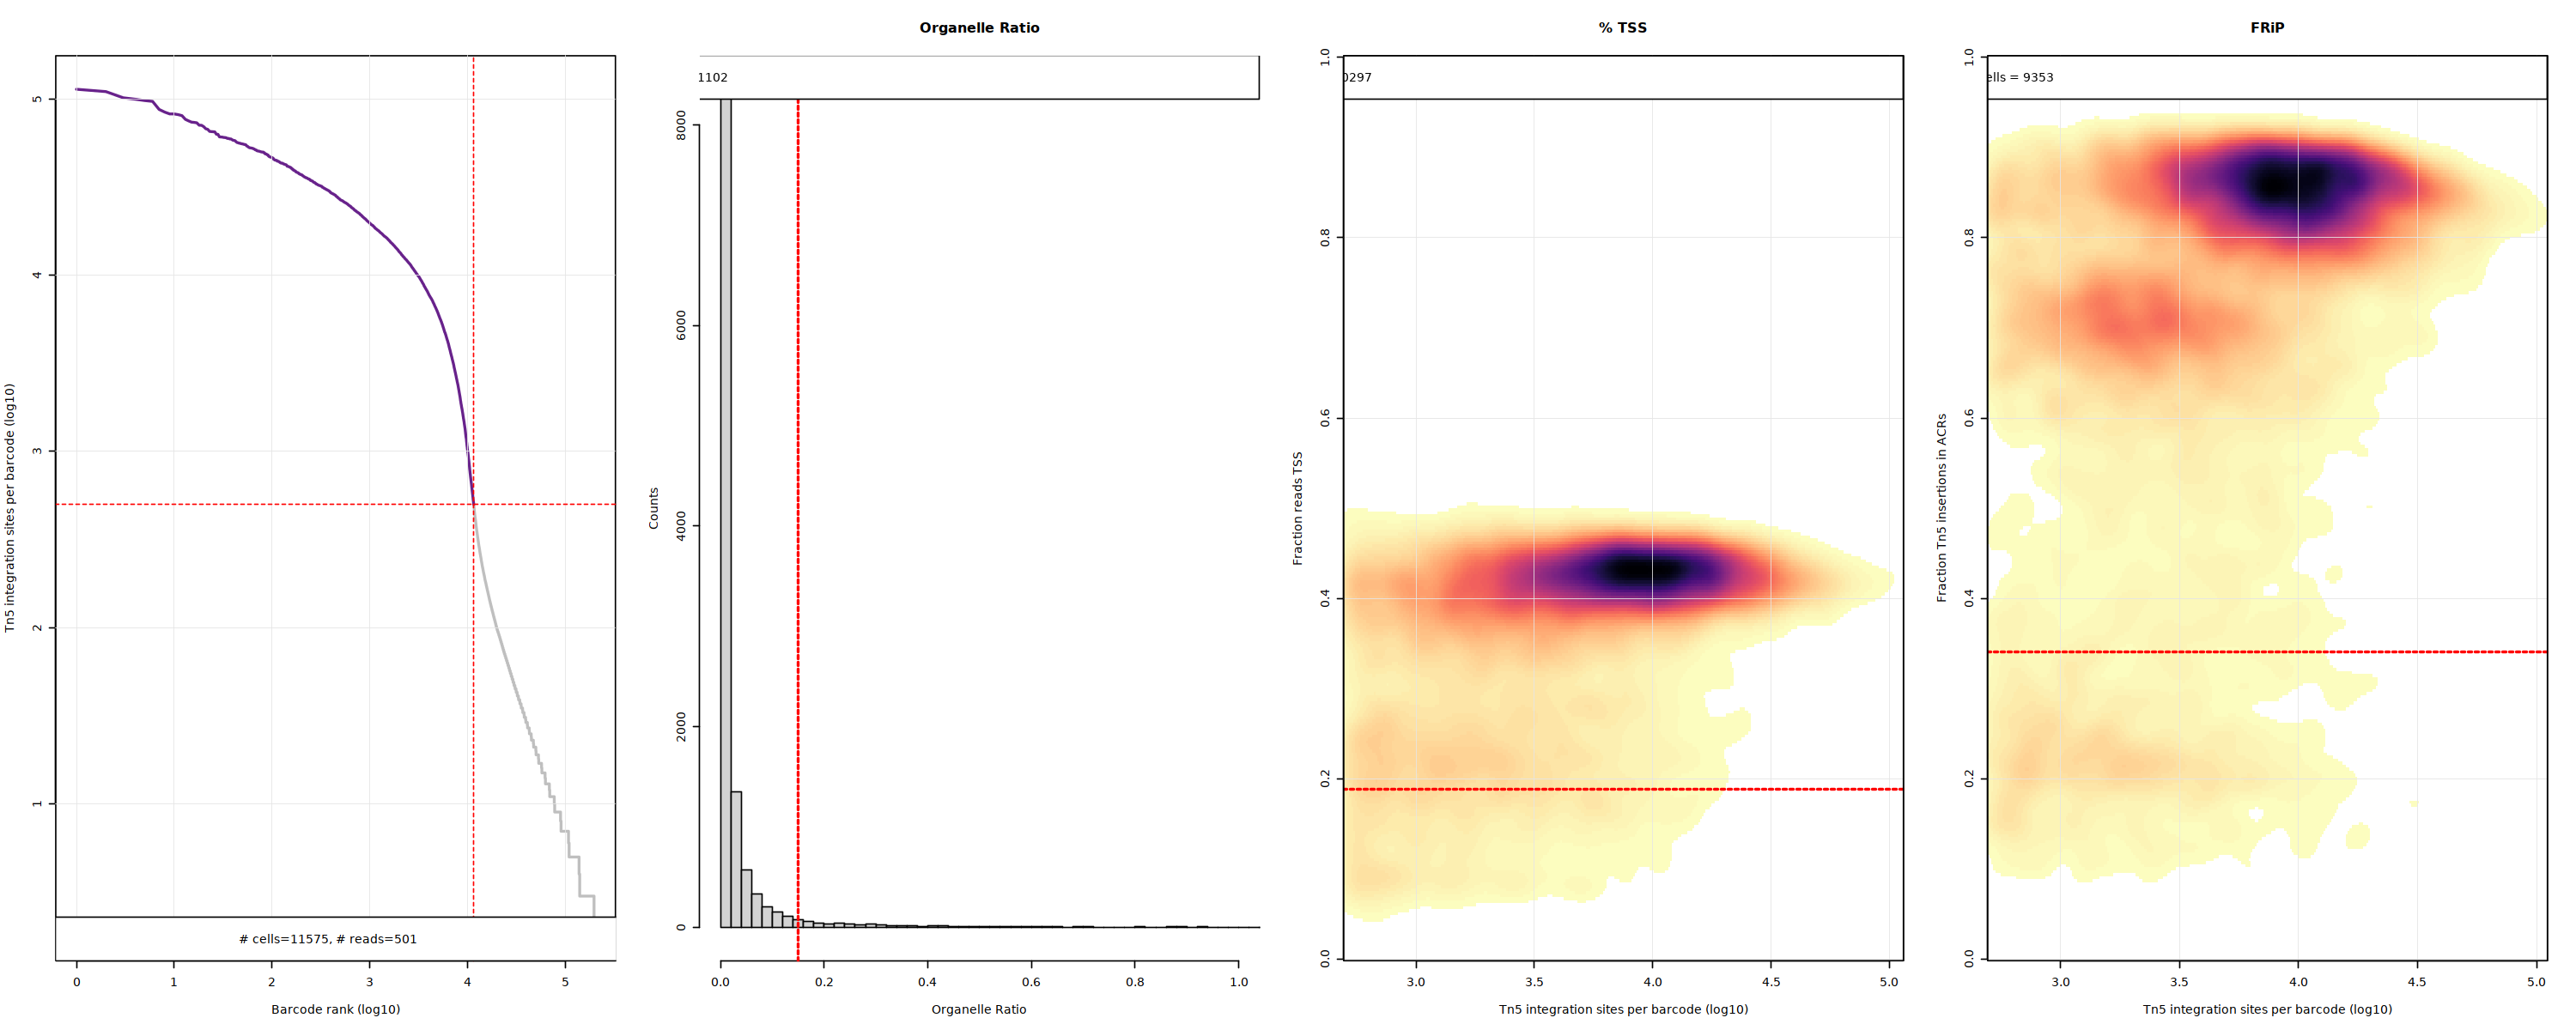

In [19]:
options(repr.plot.width=25, repr.plot.height=10)
Proso_millet.leaf.rep1.meta_file <- findCells(Proso_millet.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=15000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = TRUE,
                                        org.filter.thresh=0.15,
                                        prefix=NULL)

In [20]:
options(repr.plot.width=25, repr.plot.height=10)
Proso_millet.leaf.rep1.meta_file <- findCells(Proso_millet.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=15000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = TRUE,
                                        org.filter.thresh=0.15,
                                        prefix=paste0(output_path_imgs, pre))

Making Dotplot

... Filtering Cells based of Oragnelle Reads



In [21]:
# generate sparse matrix
Proso_millet.leaf.rep1.meta_file.filtered <- generateMatrix(Proso_millet.leaf.rep1.meta_file,
                            filtered=FALSE,
                            windows=500,
                            blacklist="/home/jpm73279/genome_downloads/Pmiliaceum/markers/Pm.cell_cycle_orthos.markers.bed",
                            peaks=F,
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

Proso_millet.leaf.rep1.meta_file.filtered <- isCell(Proso_millet.leaf.rep1.meta_file.filtered,
      num.ref = 5000, verbose = TRUE)

#save_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output"

passing_cells <- Proso_millet.leaf.rep1.meta_file.filtered$meta  %>% 
    dplyr::filter(is_cell == 1)



Proso_millet.leaf.rep1.meta_file.filtered$meta.v3 <- passing_cells
    

 - converting triplet format to sparseMatrix

 - setting filters

 - parsing initial boundaries

 - normalizing distributions and creating references

 - performing feature selection (this step is a bottle-neck and may take a while to complete)

 - estimating correlations



In [22]:
pre

[1] "panicum_millet.rep_2.merged"

In [23]:

# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Proso_millet.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Proso_millet.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

 - converting triplet format to sparseMatrix

